# 1. Business Understanding

# Description:

Las enfermedades cardiacas 

Heart disease is one of the biggest health problems each year. Each year more people die from cardiovascular disease (CVD) than from any other cause. More than three-fourths of deaths related to heart disease and stroke occur in low- and middle-income countries, representing a serious health problem in Latin American countries. It is also related to poor diet, sedentary and unhealthy lifestyles and smoking[<a href="https://scc.org.co/wp-content/uploads/2012/08/capitulo-1.pdf">1</a>, <a href="https://www.paho.org/es/temas/enfermedades-cardiovasculares">2</a>].

The main symptoms are [<a href="https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118">3</a>]:
* Chest pain, chest tightness, chest pressure and chest discomfort (angina)
* Shortness of breath
* Pain in the neck, jaw, throat, upper belly area or back
* Pain, numbness, weakness or coldness in the legs or arms if the blood vessels in those body areas are narrowed

To help health personnel around the world many initiatives for data collection, analysis of these data and creation of prediction and diagnosis models are created every year. With the rise of machine learning and artificial intelligence to support health models, many models for the diagnosis of these diseases based on probabilistic methods such as Bayesian, rule-based methods such as decision trees or data segmentation methods, both linear and non-linear such as support vector machines or those based on neural networks have been tested around the world and have proven their effectiveness[<a href="http://www.ripublication.com/acst17/acstv10n7_13.pdf">4</a>].

In [2]:
# Conectamos con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Set local path as:
%cd /content/drive/MyDrive/TIC en Salud/Week 4 - Data Preparation
!ls

/content/drive/MyDrive/TIC en Salud/Week 4 - Data Preparation
Data			      final_heart_disease.ipynb  Homework.ipynb
Data_Preparation_Covid.ipynb  Graph_data.ipynb


In [7]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Constantes

In [8]:
# Definimos la ruta a los datos:
PATH = 'Data/Data_final'

# 2. Dataset:

<h3> <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/">Heart Disease </a> </h3>

### Descripción del Dataset:

Es un dataset conformado por diferentes pacientes que acudieron a consulta por sospechas de enfermedad del corazón en 4 entidades de salud diferentes en Julio 22 de 1988:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi
* University Hospital, Zurich, Switzerland: William Steinbrunn
* University Hospital, Basel, Switzerland: Matthias Pfisterer
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation


El dataset está compuesto por 14 columnas las cuales son:


1. Edad : Es un entero se da en días
2. Sexo : Es un binario (M / F)
3. Dolor de Pecho (CP) : Es un fltante se da en kg
  * 1: angina típica
  * 2: angina atípica
  * 3: dolor no anginoso
  * 4: asintomático
4.  presión arterial (trestbps): presión arterial en reposo (en mm Hg al ingreso en el hospital) es una variable flotante
5.  colesterol (chol): Colesterol sérico en mg / dl
6.  Azucar Alto (): (azúcar en sangre en ayunas > 120 mg / dl) Es un binario (si / no)
7. Electrocardiográma (restecg): resultados electrocardiográficos en reposo
  * 0: normal, 
  * 1: Anomalía de la onda <a href="https://litfl.com/st-segment-ecg-library/">ST-T </a> (inversiones de la onda T y/o ST elevación o depresión de> 0,05 mV))
  * 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes
8. frecuencia máxima (thalach): cardíaca máxima alcanzada (flotante)
9. angina ejercicio (exang): angina inducida por ejercicio binario (si / no)
10. depresion st: Depresión del ST inducida por el ejercicio en relación con el reposo
11. pendiente: la pendiente del segmento ST de ejercicio pico 
  * 1: pendiente ascendente
  * 2: plano
12. Vasos principales: número de vasos principales (0-3) coloreados por fluoroscopia
13. talasemia (thal): Un trastorno sanguíneo.
  * 3 = normal
  * 6 = defecto fijo 
  * 7 = defecto reversible
14. diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)
  * 0: < 50% de estrechamiento del diámetro 
  * 1 : > 50% de estrechamiento del diámetro
 

In [9]:
# Vemos los archivos que contiene la carpeta
os.listdir(PATH)

['processed.hungarian.csv',
 'processed.cleveland.csv',
 'processed.switzerland.csv',
 'processed.va.csv',
 'heart-disease.txt',
 'reprocessed.hungarian.csv']

## 2.1 Archivos descargados en el dataset:

* Descripción: Una descripción de los datos recolectados para cada paciente y de entre estos los datos que fueron seleccionados para la conformación del dataset
* 4 Archivos csv: La carpeta está conformada por los datasets de los centros de salud mencionados en anteriormente

## 2.2 Archivo Descripción:

In [10]:
# Usamos Open de python para abrir el archivo con la descripción (names-disease.txt)
with open(os.path.join(PATH, 'heart-disease.txt')) as f:
    names = f.readlines()
names

['Publication Request: \n',
 '   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n',
 '   This file describes the contents of the heart-disease directory.\n',
 '\n',
 '   This directory contains 4 databases concerning heart disease diagnosis.\n',
 '   All attributes are numeric-valued.  The data was collected from the\n',
 '   four following locations:\n',
 '\n',
 '     1. Cleveland Clinic Foundation (cleveland.data)\n',
 '     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)\n',
 '     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)\n',
 '     4. University Hospital, Zurich, Switzerland (switzerland.data)\n',
 '\n',
 '   Each database has the same instance format.  While the databases have 76\n',
 "   raw attributes, only 14 of them are actually used.  Thus I've taken the\n",
 '   liberty of making 2 copies of each database: one with all the attributes\n',
 '   and 1 with the 14 attributes actually used in past experiments.\n',
 '\n',


## 2.3 Datasets (Archivos csv)

In [11]:
# los Datasets vienen sin columnas, así que definimos las columnas en una lista:
columns = ['edad', 'sexo', 'dolor_pecho', 'presion_arterial', 'colesterol', 'azucal_alto', 'electrocardiograma', 'frecuencia_max', 'angina_ejercicio', 'depresion_st', 'pendiente_st', 'vasos_principales', 'talasemia', 'enfermedad_cardiaca']

# Luego seleccionamos la ruta los datasets, para esto en la ruta tomamos solo los archivos en formato csv:
file_path = [os.path.join(PATH, file_name) for file_name in os.listdir(PATH) if file_name.endswith('.csv')]

# También podemos seleccionar los lugares a los que pertence esta ruta en orden
# Tomamos de cada ruta los caracteres luego del primer . y eliminas los ultimos 4 caracteres (.csv)
place = [file_name[file_name.index('.')+1:-4] for file_name in os.listdir(PATH) if file_name.endswith('.csv')]

print(f'Los lugares en los que se recolectaron datos son: {place}')
print('')
print('La ruta a los datasets es:')
file_path

Los lugares en los que se recolectaron datos son: ['hungarian', 'cleveland', 'switzerland', 'va', 'hungarian']

La ruta a los datasets es:


['Data/Data_final/processed.hungarian.csv',
 'Data/Data_final/processed.cleveland.csv',
 'Data/Data_final/processed.switzerland.csv',
 'Data/Data_final/processed.va.csv',
 'Data/Data_final/reprocessed.hungarian.csv']

In [12]:
# Una vez hecho esto podemos usar la ruta para leer el dataframe y asignar las columnas
cleveland_df = pd.read_csv(file_path[0], names=columns)
cleveland_df.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [13]:
hungarian_df = pd.read_csv(file_path[4], names=columns, sep=' ')
hungarian_df.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [14]:
switzerland_df = pd.read_csv(file_path[2], names=columns)
switzerland_df.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [15]:
va_df = pd.read_csv(file_path[3], names=columns)
va_df.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


# 1. Técnica Seleccionada

La Razón de haber explicado primero el dataset que se va a utilizar es que de este se deriva la tarea. 

## Con base en el dataset se usará:

<p align="center">
<img src="https://lawtomated.com/wp-content/uploads/2019/04/supVsUnsup.png" width="600" height="400" style="vertical-align:middle">
</p>

* <h4>Aprendizaje supervisado:</h4> 
Esta tarea se realiza con base a el dataset, puede ser predictiva o descriptiva. Las tareas predictivas tienen una variable objetivo a predecir, mientras que la desctiptiva no se tienen estos datos. En este caso habiendo visto el dataset y entendiendo los campos que lo componen vemos que determinar una varible objetivo es muy simple. Esta sería la columna 14 (dónde se diagnostica enfermedad cardiaca). Teniendo en cuenta lo anterior por definición sabemos que el tener una etiqueta es la que nos da la posibilidad de usar una técnica predictiva (aprendizaje supervisado).


* <h4>Clasificación: </h4> 
Dentro de las tarea de aprendizaje supervisado (al igual que en el no supervisado) hay varías técnicas las cuales dependen del tipo de dato a predecir en este caso es una predicción categórica especificamente binaria ya que tiene 2 clases; 1 si tiene enfermedad cardiaca y 0 si no tiene enfermedad cardiaca. Con base en lo mencionado es una técnica de clasificación binaria.


# 4. Limpieza de datos

## 4.1 Entendimiento de los datos

In [ ]:
# Mostrar dataframe de cleveland
cleveland_df

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
cleveland_df.dtypes

edad                   float64
sexo                   float64
dolor_pecho            float64
presion_arterial       float64
colesterol             float64
azucal_alto            float64
electrocardiograma     float64
frecuencia_max         float64
angina_ejercicio       float64
depresion_st           float64
pendiente_st           float64
vasos_principales       object
talasemia               object
enfermedad_cardiaca      int64
dtype: object

In [ ]:
hungarian_df

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,-9.0,-9.0,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,-9.0,-9.0,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [ ]:
hungarian_df.dtypes

edad                   float64
sexo                   float64
dolor_pecho            float64
presion_arterial       float64
colesterol             float64
azucal_alto            float64
electrocardiograma     float64
frecuencia_max         float64
angina_ejercicio       float64
depresion_st           float64
pendiente_st           float64
vasos_principales      float64
talasemia              float64
enfermedad_cardiaca    float64
dtype: object

In [ ]:
switzerland_df

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


In [ ]:
switzerland_df.dtypes

edad                    int64
sexo                    int64
dolor_pecho             int64
presion_arterial       object
colesterol              int64
azucal_alto            object
electrocardiograma     object
frecuencia_max         object
angina_ejercicio       object
depresion_st           object
pendiente_st           object
vasos_principales      object
talasemia              object
enfermedad_cardiaca     int64
dtype: object

In [ ]:
va_df

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [ ]:
va_df.dtypes

edad                    int64
sexo                    int64
dolor_pecho             int64
presion_arterial       object
colesterol             object
azucal_alto            object
electrocardiograma      int64
frecuencia_max         object
angina_ejercicio       object
depresion_st           object
pendiente_st           object
vasos_principales      object
talasemia              object
enfermedad_cardiaca     int64
dtype: object

## 4.2 Datos nulos

### Cleveland

In [ ]:
# En este dataset los datos nulos se ecuentran dados por un signo de interrogación (?)
# Para conocer la cantidad contamos los valores iguales a el simbolo en el dataframe
print("Los valores nulos por columna son: ")
(cleveland_df == '?').sum()

Los valores nulos por columna son: 


edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      4
talasemia              2
enfermedad_cardiaca    0
dtype: int64

In [ ]:
# Convertimos ? a nan
cleveland_df = cleveland_df.replace('?', np.nan)

In [ ]:
# Para confirmar también se verifican los valores nulos (NA o NaN)
cleveland_df.isnull().sum()

edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      4
talasemia              2
enfermedad_cardiaca    0
dtype: int64

### Hungria

In [ ]:
# Como el dataset de Hungria se encuentra preprocesado dos veces
# Los valores nulos si aparecen como NaN o Na:
hungarian_df.isnull().sum()

edad                   1
sexo                   1
dolor_pecho            1
presion_arterial       1
colesterol             1
azucal_alto            1
electrocardiograma     1
frecuencia_max         1
angina_ejercicio       1
depresion_st           1
pendiente_st           1
vasos_principales      1
talasemia              1
enfermedad_cardiaca    1
dtype: int64

### Suiza

In [ ]:
# Convertimos ? a nan
switzerland_df = switzerland_df.replace('?', np.nan)

switzerland_df.isnull().sum()

edad                     0
sexo                     0
dolor_pecho              0
presion_arterial         2
colesterol               0
azucal_alto             75
electrocardiograma       1
frecuencia_max           1
angina_ejercicio         1
depresion_st             6
pendiente_st            17
vasos_principales      118
talasemia               52
enfermedad_cardiaca      0
dtype: int64

### VA

In [ ]:
# Convertimos ? a nan
va_df = va_df.replace('?', np.nan)

va_df.isnull().sum()

edad                     0
sexo                     0
dolor_pecho              0
presion_arterial        56
colesterol               7
azucal_alto              7
electrocardiograma       0
frecuencia_max          53
angina_ejercicio        53
depresion_st            56
pendiente_st           102
vasos_principales      198
talasemia              166
enfermedad_cardiaca      0
dtype: int64

## 4.3 Unificar Dataset

Debido a la cantidad de datos nulos en en los datasets podemos concluir que: 
El dataset de VA no es utilizable, por lo cual se descarta del dataset final.
Sobre los otros datasets una técnica de Imputación puede ser utilizada en todos excepto en la columna "vasos_principales" de Suiza la cual no cumple con un tamaño de muestra lo suficientemente grande para hacer inferencia estadistica. Por lo tanto las opciones son:

1. Crear un dataset para Suiza, Hungria y Cleveland, pero descartando la columna "vasos_principales".
2. Crear un dataset de Hungria y Cleveland con todas las columnas

Para esto haremos el análisis con una matriz de correlación para ver la influencia de esta variable en el pronóstico


###  4.3.1 Imputar Datos

#### Cleveland

In [ ]:
# Convert columns to float
cleveland_df = cleveland_df.astype(float)

In [ ]:
def impute_dataframe(DF, imputer):
  # Entrenar la instancia con el dataframe par calcular el promedio de las columnas con valores faltantes
  imp_mean.fit(DF.values)
  # Imputar valores en el dataframe (Retorna un arreglo de numpy)
  # Así que debemos volverlo a poner en el formato original:
  imputed_DF = pd.DataFrame(imputer.fit_transform(DF))
  imputed_DF.columns = DF.columns
  imputed_DF.index = DF.index
  return imputed_DF

In [ ]:
from sklearn.impute import SimpleImputer

# Imputar con el valor promedio para Suiza y Cleveland 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputar valores
cleveland_df = impute_dataframe(cleveland_df, imp_mean)

# Valores nulos para Cleveland:
cleveland_df.isna().sum()

edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      0
talasemia              0
enfermedad_cardiaca    0
dtype: int64

In [ ]:
# tipos de datos en dataframe Cleveland
cleveland_df.dtypes

edad                   float64
sexo                   float64
dolor_pecho            float64
presion_arterial       float64
colesterol             float64
azucal_alto            float64
electrocardiograma     float64
frecuencia_max         float64
angina_ejercicio       float64
depresion_st           float64
pendiente_st           float64
vasos_principales      float64
talasemia              float64
enfermedad_cardiaca    float64
dtype: object

#### Hungria

In [ ]:
# Valores nulos para Hungria:
hungarian_df = hungarian_df[~hungarian_df.edad.isnull()]
hungarian_df.isnull().sum()

edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      0
talasemia              0
enfermedad_cardiaca    0
dtype: int64

In [ ]:
# tipos de datos en dataframe Hungria
hungarian_df.dtypes

edad                   float64
sexo                   float64
dolor_pecho            float64
presion_arterial       float64
colesterol             float64
azucal_alto            float64
electrocardiograma     float64
frecuencia_max         float64
angina_ejercicio       float64
depresion_st           float64
pendiente_st           float64
vasos_principales      float64
talasemia              float64
enfermedad_cardiaca    float64
dtype: object

#### Suiza

In [ ]:
# Convert columns to float
switzerland_df = switzerland_df.astype(float)

In [ ]:
# Si bien algunos valores continuos se pueden inputar con el valor promedio
# Para valores discretos se debe buscar una alternativa como en este caso la moda
discrete_columns = ['azucal_alto', 'electrocardiograma', 'angina_ejercicio', 'pendiente_st', 'vasos_principales', 'talasemia']
# Elegimos las columnas que queremos imputar e imputar usando la moda
switzerland_df.loc[:,discrete_columns] = switzerland_df.loc[:,discrete_columns].fillna(switzerland_df.loc[:,discrete_columns].mode().iloc[0])

In [ ]:
# Imputar valores
switzerland_df = impute_dataframe(switzerland_df, imp_mean)

# Valores nulos para Suiza:
switzerland_df.isna().sum()

edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      0
talasemia              0
enfermedad_cardiaca    0
dtype: int64

### 4.4 Limpiar variables

In [ ]:
def clean_target(x):
  if x == 0:
    return 0.0
  else:
    return 1.0

#### Cleveland

In [ ]:
cleveland_df.enfermedad_cardiaca = cleveland_df.enfermedad_cardiaca.apply(lambda x: clean_target(x))
cleveland_df.enfermedad_cardiaca

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
298    1.0
299    1.0
300    1.0
301    1.0
302    0.0
Name: enfermedad_cardiaca, Length: 303, dtype: float64

#### hungria

In [ ]:
hungarian_df.enfermedad_cardiaca

0      0.0
1      1.0
2      0.0
3      3.0
4      0.0
      ... 
289    0.0
290    0.0
291    0.0
292    0.0
293    0.0
Name: enfermedad_cardiaca, Length: 294, dtype: float64

### Suiza

In [ ]:
switzerland_df.enfermedad_cardiaca = switzerland_df.enfermedad_cardiaca.apply(lambda x: clean_target(x))
switzerland_df.enfermedad_cardiaca

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
118    1.0
119    1.0
120    0.0
121    1.0
122    1.0
Name: enfermedad_cardiaca, Length: 123, dtype: float64

## 4.5 Verificación datos nulos

In [ ]:
#Antes de realizar la unión de los datasets, se procede a verificar datos que tengan el valor -9, esto se debe a que en la descripción del dataset
#Los datos que eran nulos, se les asignó el valor -9
# Para conocer la cantidad contamos los valores iguales a -9.0 en cada dataframe el dataframe
print("Los valores nulos por columna son: ")
(cleveland_df == -9.0).sum()

Los valores nulos por columna son: 


edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      0
talasemia              0
enfermedad_cardiaca    0
dtype: int64

In [ ]:
print("Los valores nulos por columna son: ")
(switzerland_df == -9.0).sum()

Los valores nulos por columna son: 


edad                   0
sexo                   0
dolor_pecho            0
presion_arterial       0
colesterol             0
azucal_alto            0
electrocardiograma     0
frecuencia_max         0
angina_ejercicio       0
depresion_st           0
pendiente_st           0
vasos_principales      0
talasemia              0
enfermedad_cardiaca    0
dtype: int64

In [ ]:
print("Los valores nulos por columna son: ")
(hungarian_df == -9.0).sum()

Los valores nulos por columna son: 


edad                     0
sexo                     0
dolor_pecho              0
presion_arterial         1
colesterol              23
azucal_alto              8
electrocardiograma       1
frecuencia_max           1
angina_ejercicio         1
depresion_st             0
pendiente_st           190
vasos_principales      290
talasemia              266
enfermedad_cardiaca      0
dtype: int64

# Conclusión Dataset Hungría


Como se puede observar, la descripción del dataset dice '9. Missing Attribute Values: Several.  Distinguished with value -9.0.\n', por lo que los valores faltantes se representan con el valor -9.0, de esta forma se llega a la conclusión de que el dataset de Hungria queda descartado, debido a que de 295 datos, 290 son valores faltantes. 


# 3. Análisis preliminar

## 3.1 Análisis de las variables
Antes de definir si usar también los datos  de suiza o eliminar la columna vasos_principales debemos revisar la relevancia de esta columna y de los datasets haciendo un análisis de los datos de componen cada dataset

#### Cleveland

In [ ]:
cleveland_df.describe()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#### Hungria

In [ ]:
hungarian_df.describe()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


#### Suiza

In [ ]:
switzerland_df.describe()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucal_alto,electrocardiograma,frecuencia_max,angina_ejercicio,depresion_st,pendiente_st,vasos_principales,talasemia,enfermedad_cardiaca
count,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.040650,0.357724,121.557377,0.439024,0.653846,1.829268,1.983740,6.300813,0.934959
std,9.032108,0.274414,0.688726,22.373476,0.0,0.198287,0.588553,25.870754,0.498298,1.029765,0.582636,0.126992,1.442533,0.247606
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.500000,0.000000,0.000000,1.000000,2.000000,7.000000,1.000000
50%,56.000000,1.000000,4.000000,130.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.500000,2.000000,2.000000,7.000000,1.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.450000,2.000000,2.000000,7.000000,1.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,1.000000


##  3.2 Matriz de Correlación

Con la matriz de correlación podremos ver la importancia de cada una de las variables sobre la variable objetivo, así podremos decidir si es o no relevante mantener el dataframe de Suiza.

<b>Coeficiente de Correlación de pearson: </b>


$$
\frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}
$$

In [ ]:
def matriz_correlacion(df):
  # Calcular la correlación
  corr = df.corr(method='pearson')
  # Tamaño de la gráfica
  plt.figure(figsize=(15, 8))
  # Mostrar gráfica como mapa de calor con valores
  sns.heatmap(corr, annot=True)
  plt.show()

#### Cleveland

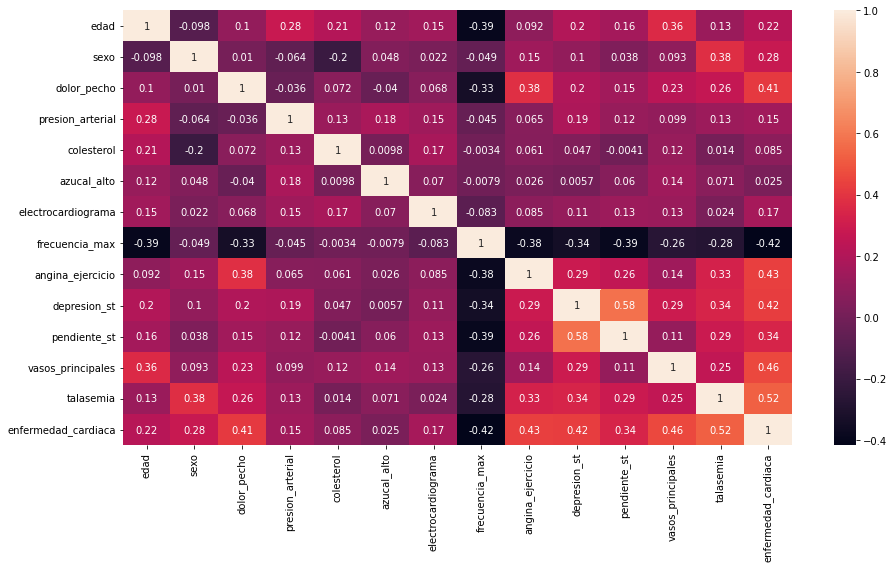

In [ ]:
# Calculamos la correlación de pearson:
matriz_correlacion(cleveland_df)

#### Hungria

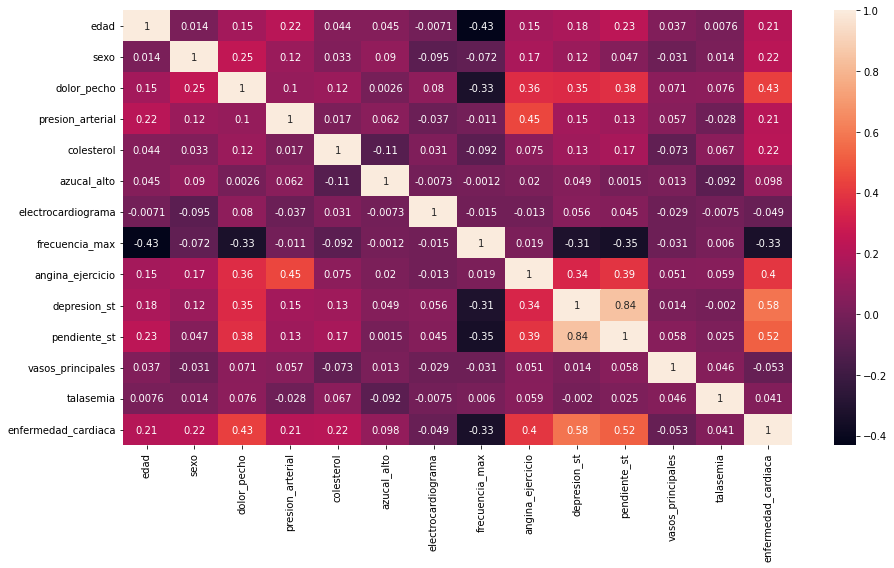

In [ ]:
# Calculamos la correlación de pearson:
matriz_correlacion(hungarian_df)

#### Suiza

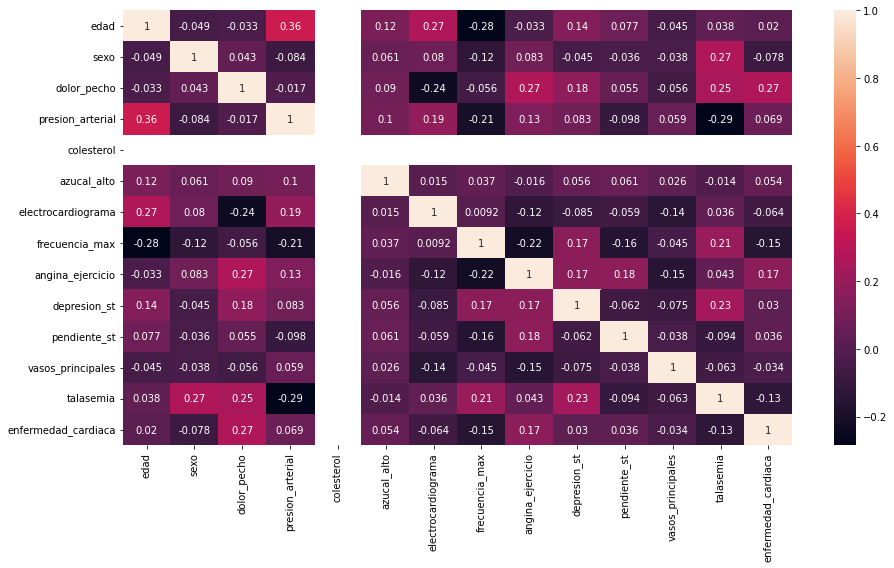

In [ ]:
# Calculamos la correlación de pearson:
matriz_correlacion(switzerland_df)

# Conclusión Sobre Dataset de Suiza:
El dataset de Suiza no es utilizable debido a que la calidad de los datos es muy mala. Las varibales no parecen estar correlacionadas con la variable objetivo, además la cantidad de datos faltante no es solo en la columna vasos_principales(Que Parece ser importante en los otros datasets), sino también en la columna colesteros. Sin mencionar la cantidad de datos que debieron ser imputados en las diferentes columnas hacen los que los datos pierdan mucha calidad.

# Gráficas de cada dataset

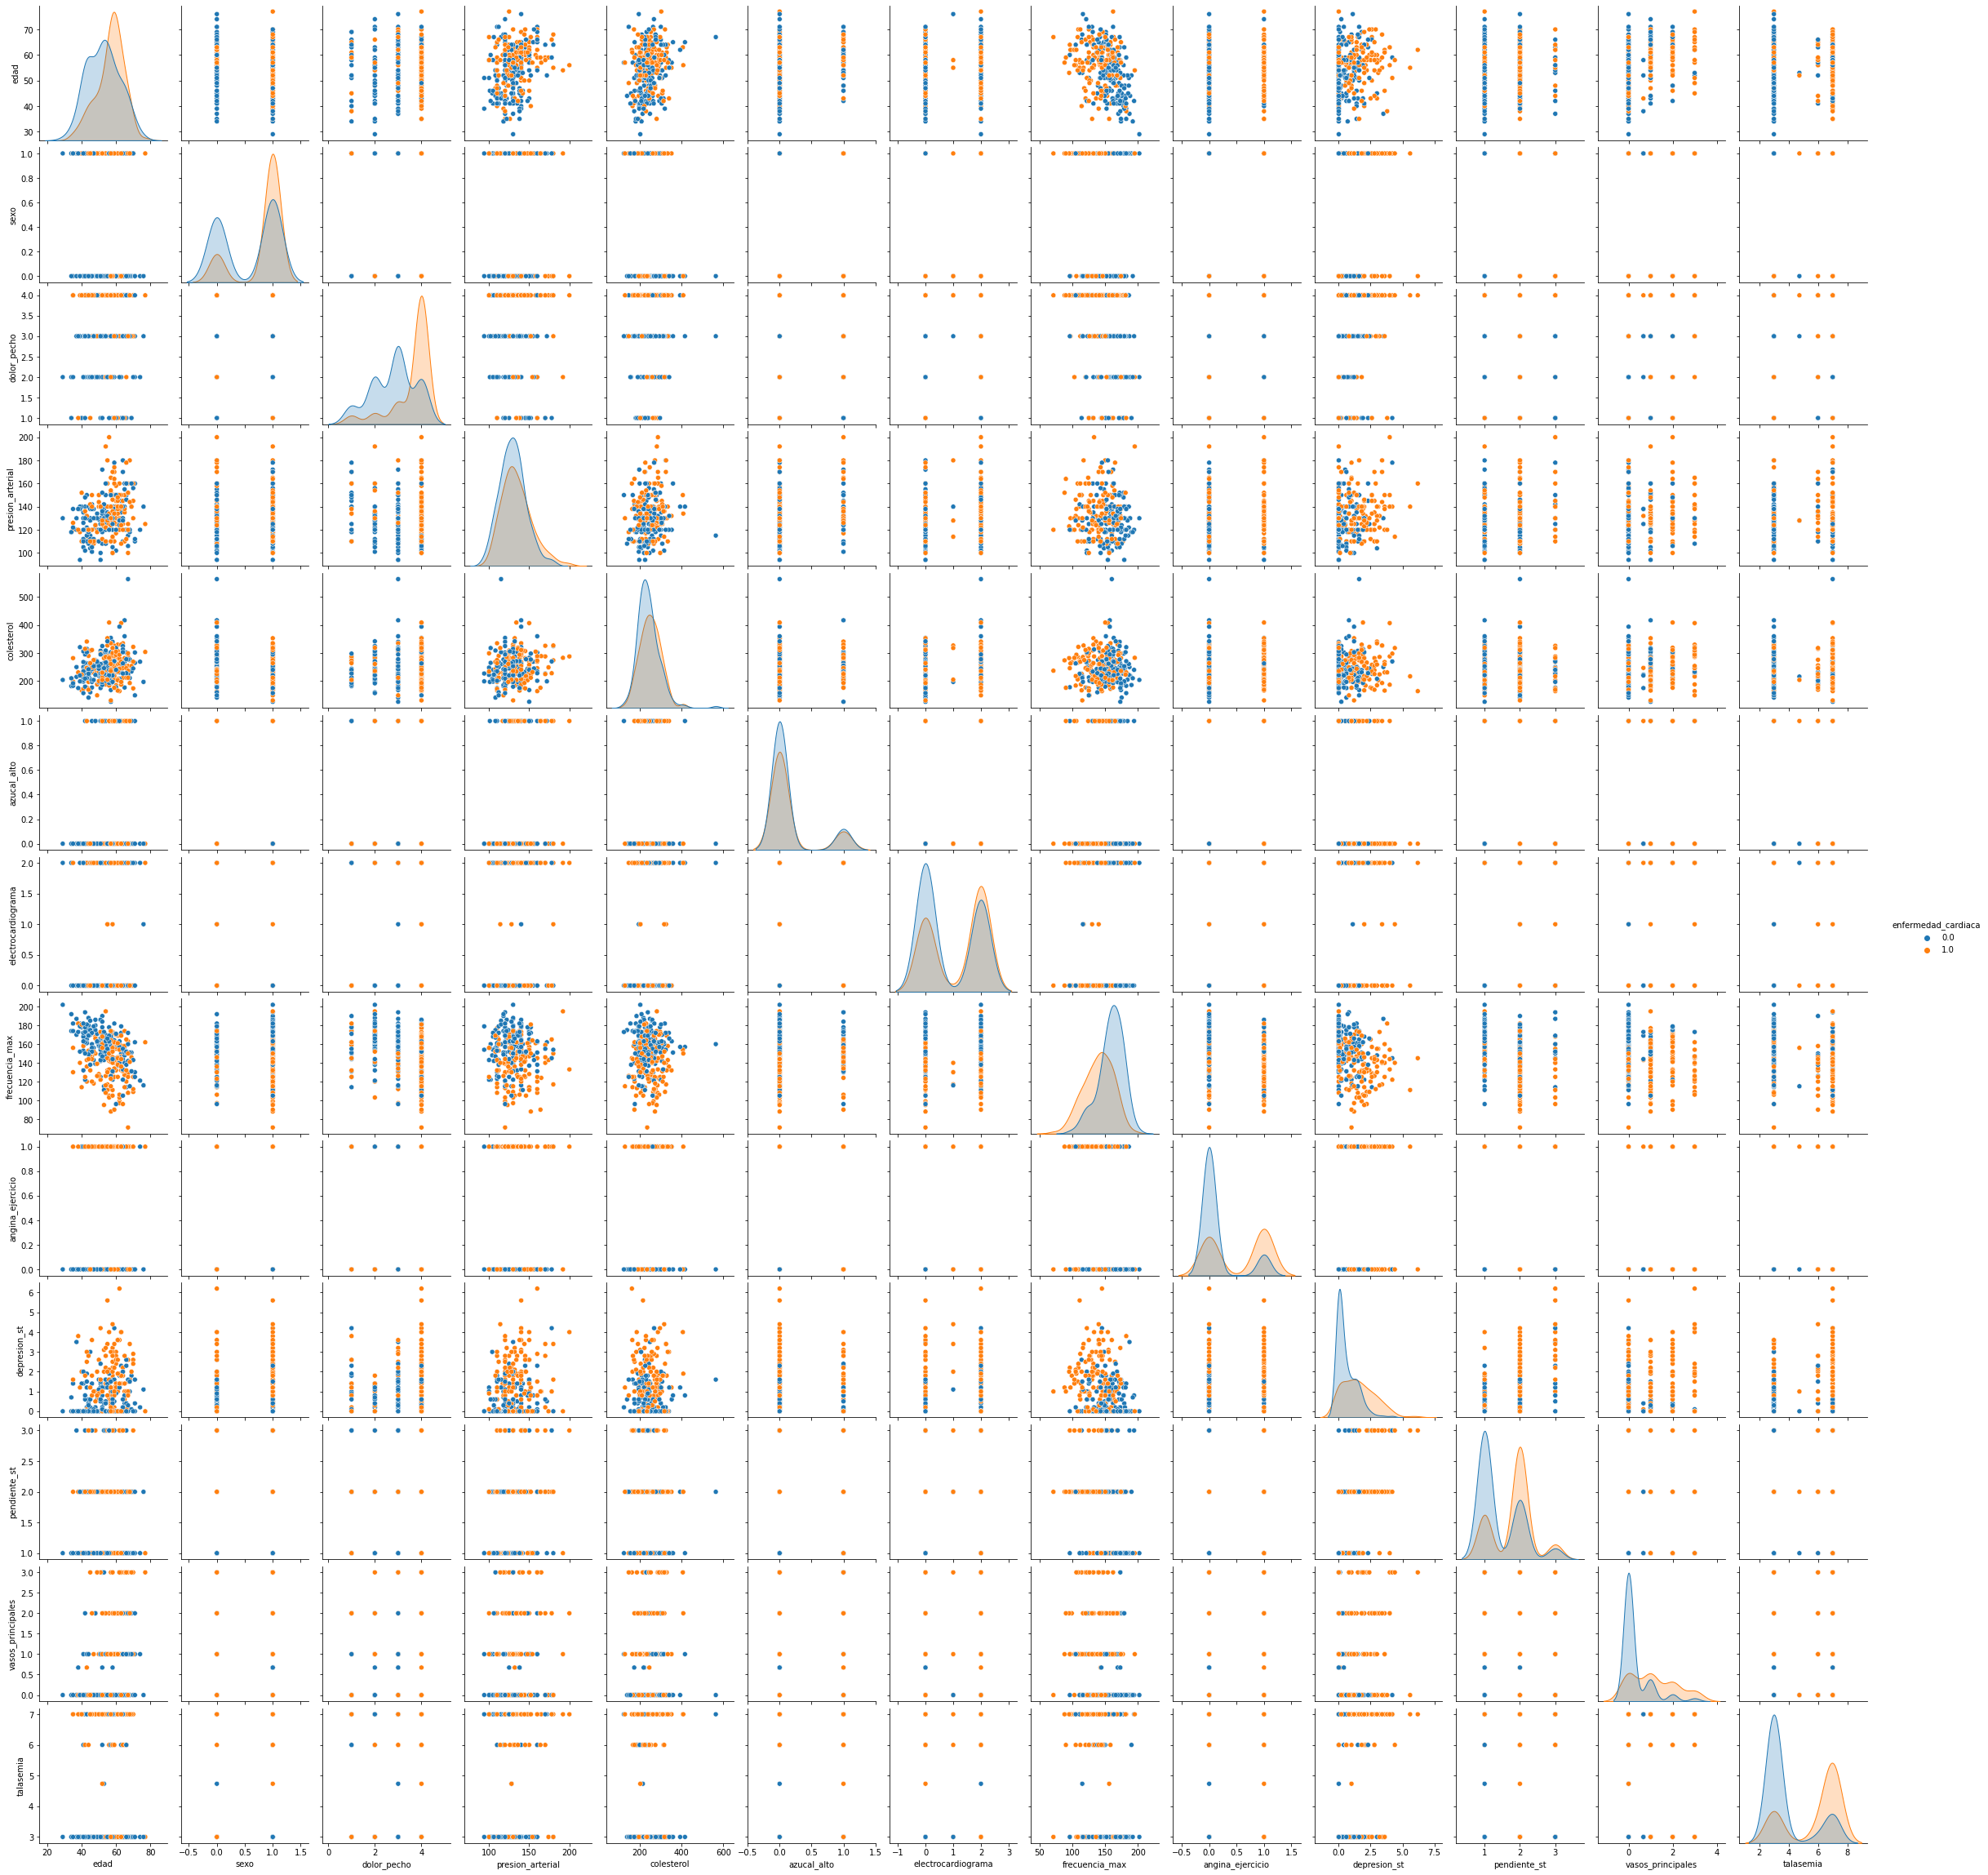

In [ ]:
sns.pairplot(cleveland_df, hue="enfermedad_cardiaca")

Nota: El dataseet a utilizar es el mismo, únicamente se cambian las variables Sexo y Enfermedad cardiaca por Masculino, Femenino y Si, No respectivamente


In [ ]:
cleveland_df_graf = cleveland_df
cleveland_df_graf = cleveland_df_graf.replace({'sexo': {0.0 : "Femenino", 1.0 : "Masculino"}})
cleveland_df_graf = cleveland_df_graf.replace({'enfermedad_cardiaca': {0.0 : "No", 1.0 : "Si"}})


Con el objetivo de observar y entender los datos, se realizaron las gráficas que se ven a continuación, estas gráficas representan cada columna del dataset, y permiten identificar el promedio de datos de cada columna, teniendo en cuenta el sexo de las personas entrevistadas, y si tiene una enfermedad cardiaca.

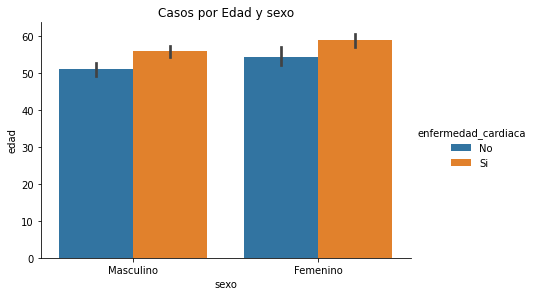

In [ ]:
g = sns.catplot(x="sexo", y="edad",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por Edad y sexo');
           

Este gráfica corresponde a la influencia de la edad en casos de enfermedad cardiaca, considerando si es masculino o femenino.  En ambos casos, las enfermedades cardiacas se presentan a mayor edad. En los hombres las enfermedades cardiacas se presentan a los 55 años, mientras que en las mujeres se presentan cerca a los 60 años.

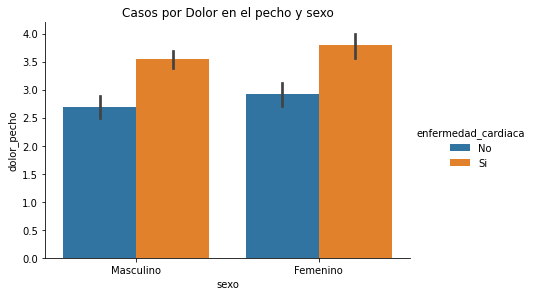

In [ ]:
ax = sns.catplot(x="sexo", y="dolor_pecho",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por Dolor en el pecho y sexo');
                

Esta gráfica corresponde a la posibilidad de tener enfermedad cardiaca, considerando el dolor en el pecho que siente la persona, clasificados según el sexo de esta. En ambos casos se observa, que, la enfermedad cardiaca se presenta en su mayoría en personas que tienen mayor dolor en el pecho. De un rango de 0 a 4, (4 es el mayor dolor), para los hombres el promedio de dolor que representa enfermedad cardiaca es de 3.5, mientras que para las mujeres es un poco mayor a ese valor.

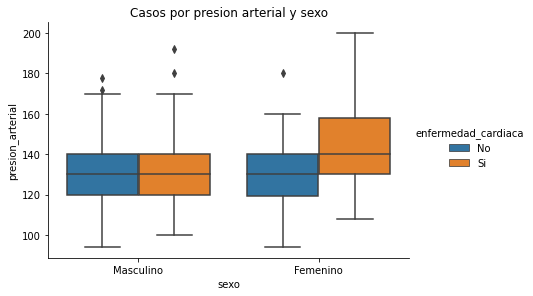

In [ ]:
g = sns.catplot(x="sexo", y="presion_arterial",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="box",
                height=4, aspect=1.5).set(title='Casos por presion arterial y sexo');

Esta gráfica corresponde a los resultados de la presión arterial en reposo, y su influencia en la presencia de enfermedad cardiaca, considerando el sexo de la persona en cuestión. En este caso se obtuvieron resultados diferentes. En el caso de los hombres, la presencia de enfermedad cardiaca no se relaciona con la presión arterial en reposo, es decir, los datos obtenidos de la presión arterial son los mismos para los pacientes que tienen y que no tienen enfermedad cardiaca. En el caso de las mujeres, si se puede observar, que las enfermedades cardiacas se presentan en pacientes que tienen mayor presión arterial en reposo.

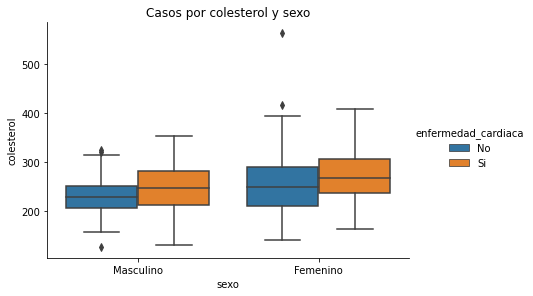

In [ ]:
g = sns.catplot(x="sexo", y="colesterol",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="box",
                height=4, aspect=1.5).set(title='Casos por colesterol y sexo');

Este gráfica corresponde a la influencia del colesterol en las enfermedades cardiacas, considerando el sexo de la persona. Como se puede observar, en ambos casos, las enfermedades cardiacas se presentan en personas que tienen mayor colesterol. En los hombres las enfermedades cardiacas se presentan en personas con colesterol cercano a 250, mientras que las mujeres con colesterol cercano a 270 presentan enfermedades cardiacas.

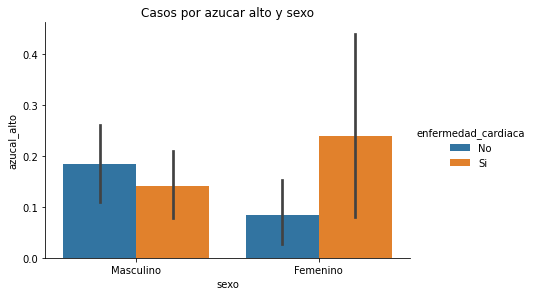

In [ ]:
g = sns.catplot(x="sexo", y="azucal_alto",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por azucar alto y sexo');

Esta gráfica establece una relación entre el nivel de azúcar y la presencia de enfermedades cardiacas en hombres y mujeres. En esta gráfica se obtuvieron resultados diferentes. Como se puede observar, en el caso de los hombres, el azúcar alto no se relaciona con la presencia de enfermedades cardiacas. En caso contrario, el resultado de las mujeres da a entender, que las personas con enfermedades cardiacas presentan azúcar alto.

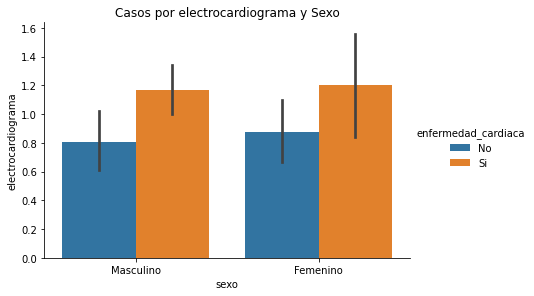

In [ ]:
g = sns.catplot(x="sexo", y="electrocardiograma",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por electrocardiograma y Sexo');

Esta gráfica corresponde al resultado de electrocardiograma y su relación con enfermedades cardiacas en hombres y mujeres. Los tres datos que pueden generarse son 0, 1 y 2. El valor 0 corresponde a un resultado normal, 1 corresponde a una anormalidad en la onda del electrocardiograma, y 2 corresponde a hipertrofia probable o definitiva del ventrículo izquierdo. En ambos casos tanto para hombres como para mujeres, el promedio de resultados de electrocardiogramas que se relaciona con enfermedad cardiaca es mayor a 1, es decir, las personas con enfermedades cardiacas presentan anormalidad en la onda del electrocardiograma.

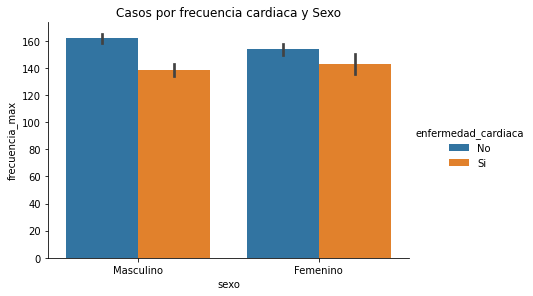

In [ ]:
g = sns.catplot(x="sexo", y="frecuencia_max",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por frecuencia cardiaca y Sexo');

Esta gráfica corresponde a la máxima frecuencia cardiaca alcanzada en hombres y mujeres, y la relación con la presencia de enfermedad cardiaca. Como se puede observar, tanto para hombres como para mujeres, en el caso de presentar enfermedad cardiaca la frecuencia máxima alcanzada es cercana a 140, mientras que, en el caso de no presentar enfermedad cardiaca, la frecuencia máxima para ambos casos es cercana a 160.

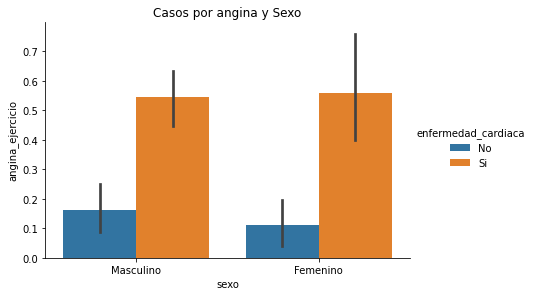

In [ ]:
g = sns.catplot(x="sexo", y="angina_ejercicio",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por angina y Sexo');

Esta gráfica presenta la relación entre la angina ocasionada por ejercicio y la presencia de enfermedades cardiacas para hombres y mujeres. Los resultados obtenidos en ambos casos, tanto para hombres como para mujeres son similares. Las personas que presentan angina debido al ejercicio se representan con valor 1, es decir, del promedio de respuestas, la mayoría de personas que presentaron angina, tienen enfermedad cardiaca.  

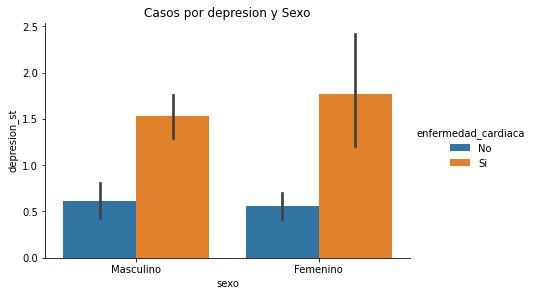

In [ ]:
g = sns.catplot(x="sexo", y="depresion_st",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por depresion y Sexo');

Esta gráfica representa la depresión del segmento ST en el electrocardiograma y la relación con la presencia de enfermedad cardiaca para hombres y mujeres. En este caso, mientras mayor sea la respuesta, mayor es el descenso del segmento ST, por lo tanto, tanto para hombres como para mujeres, las personas con enfermedad cardiaca presentan un descenso mayor del segmento ST.

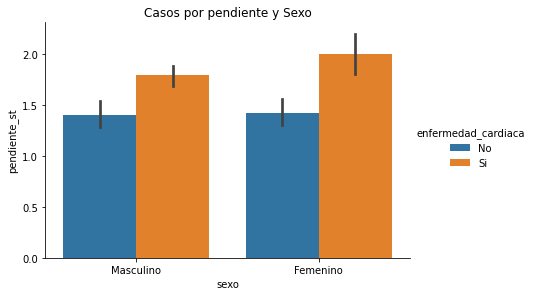

In [ ]:
g = sns.catplot(x="sexo", y="pendiente_st",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por pendiente y Sexo');

Esta gráfica presenta la pendiente del segmento ST durante el ejercicio y su relación con la presencia de enfermedades cardiacas en hombres y mujeres.  Los datos que se obtuvieron se clasificaron en 1, 2 y 3. El valor 1 representa el segmento ST con pendiente ascendente, el valor 2 representa el segmento ST sin pendiente, es decir, plano, y el valor 3 representa el segmento ST con una pendiente descendente. En este caso, las enfermedades cardiacas se presentan en hombres y mujeres con un promedio que ronda el valor 2, por lo que el segmento ST resulta plano.

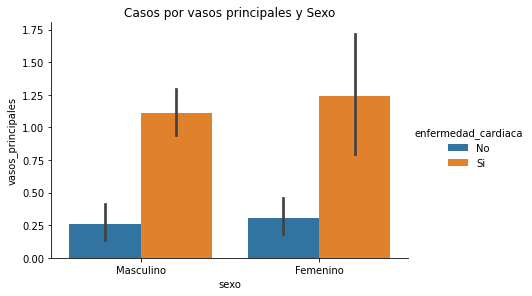

In [ ]:
g = sns.catplot(x="sexo", y="vasos_principales",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por vasos principales y Sexo');

Esta gráfica relaciona el número de vasos principales coloreados por fluoroscopia y la presencia de enfermedad cardiaca en hombres y mujeres. El valor del número de vasos principales coloreados por fluoroscopia varía de 0 a 3, y es utilizado para medir la probabilidad de enfermedad cardiaca en trabajos realizados previamente. En este caso se puede observar que las personas que poseen enfermedad cardiaca presentan en promedio 1 vaso sanguíneo principal coloreado.

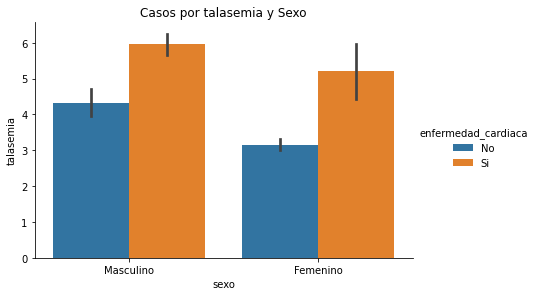

In [ ]:
g = sns.catplot(x="sexo", y="talasemia",
                hue="enfermedad_cardiaca",
                data=cleveland_df_graf, kind="bar",
                height=4, aspect=1.5).set(title='Casos por talasemia y Sexo');

La  gráfica anterior representa la talasemia y su relación con enfermedades cardiacas en hombres y mujeres. La talasemia es un trastorno sanguíneo que se relaciona con la cantidad de hemoglobina que el cuerpo produce (anemia).  Los resultados se presentan en tres valores posibles 3, 6, 7. El valor 3 representa una condición normal, el valor 6 representa un defecto fijo y el valor 7 representa un defecto reversible. En la gráfica se puede observar que las personas con enfermedades cardiacas presentan en promedio un defecto fijo relacionado con la talasemia.

<function matplotlib.pyplot.show>

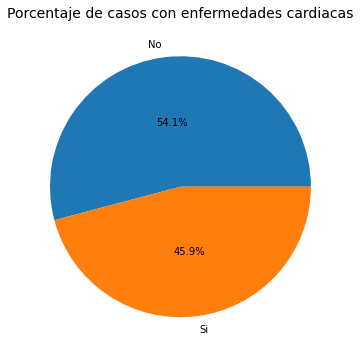

In [ ]:
# Agrupamos por clase y contamos el numero en cada uno
group_cleve = cleveland_df_graf.groupby(['enfermedad_cardiaca']).count()

# definimos el tamaño de la figura
pie, ax = plt.subplots(figsize=[10,6])

# los labels serán el indice generado en el agrupamiento (positivo o negativo)
labels = group_cleve.index

# graficamos definiendo cualquier columna (todas tienen el mismo valor)
plt.pie(x=group_cleve.sexo, autopct="%.1f%%", labels=labels, pctdistance=0.5)

# añadimos el titulo
plt.title("Porcentaje de casos con enfermedades cardiacas", fontsize=14);

plt.show

La gráfica anterior presenta cómo están distribuidos los datos en el dataframe, relacionados a las enfermedades cardiacas. Como se puede observar, está desbalanceado, porque el 54.1 % de personas no presenta enfermedad cardiaca y el 45.9% de personas presenta enfermedad cardiaca.

<function matplotlib.pyplot.show>

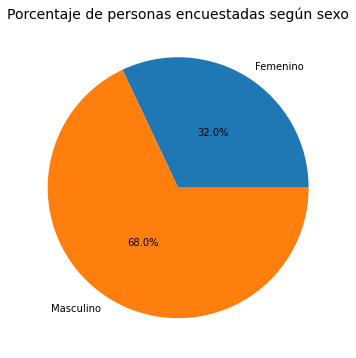

In [ ]:
# Agrupamos por clase y contamos el numero en cada uno
group_cleve = cleveland_df_graf.groupby(['sexo']).count()

# definimos el tamaño de la figura
pie, ax = plt.subplots(figsize=[10,6])

# los labels serán el indice generado en el agrupamiento (positivo o negativo)
labels = group_cleve.index

# graficamos definiendo cualquier columna (todas tienen el mismo valor)
plt.pie(x=group_cleve.enfermedad_cardiaca, autopct="%.1f%%", labels=labels, pctdistance=0.5)

# añadimos el titulo
plt.title("Porcentaje de personas encuestadas según sexo", fontsize=14);

plt.show

La gráfica anterior presenta la cantidad de hombres y mujeres encuestados, en este caso, el 32% de personas con mujeres y el 68% de personas son hombres. 

In [ ]:
cleveland_df.dtypes

edad                   float64
sexo                   float64
dolor_pecho            float64
presion_arterial       float64
colesterol             float64
azucal_alto            float64
electrocardiograma     float64
frecuencia_max         float64
angina_ejercicio       float64
depresion_st           float64
pendiente_st           float64
vasos_principales      float64
talasemia              float64
enfermedad_cardiaca    float64
dtype: object